In [2]:
# reading in necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('darkgrid')
%matplotlib inline

# 1) WRANGLING

In [3]:
# reading csv 2015 citi bike dataset
df = pd.read_csv('JC-201512-citibike-tripdata.csv')
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2118,2015-12-01 00:49:31,2015-12-01 01:24:49,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,24497,Subscriber,1975.0,1
1,267,2015-12-01 01:48:34,2015-12-01 01:53:02,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24543,Subscriber,1982.0,1
2,119,2015-12-01 03:05:28,2015-12-01 03:07:27,3214,Essex Light Rail,40.712774,-74.036486,3183,Exchange Place,40.716247,-74.033459,24450,Subscriber,1983.0,1
3,340,2015-12-01 05:37:09,2015-12-01 05:42:49,3203,Hamilton Park,40.727596,-74.044247,3202,Newport PATH,40.727224,-74.033759,24445,Subscriber,1970.0,1
4,638,2015-12-01 05:50:32,2015-12-01 06:01:11,3207,Oakland Ave,40.737604,-74.052478,3185,City Hall,40.717733,-74.043845,24631,Subscriber,1984.0,2


In [4]:
df.shape

(11838, 15)

In [5]:
df.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,1.183800e+04,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000,11118.000000,11838.000000
mean,1.274593e+03,3199.221997,40.723986,-74.046689,3195.291434,40.723114,-74.045749,24537.236357,1978.393866,1.137101
std,5.594387e+04,11.236070,0.008287,0.011406,73.926544,0.007973,0.011578,148.915449,9.730997,0.493301
min,6.300000e+01,3183.000000,40.697030,-74.096937,247.000000,40.697030,-74.096937,19628.000000,1941.000000,0.000000
25%,2.570000e+02,3187.000000,40.718489,-74.050656,3186.000000,40.717733,-74.050656,24448.000000,1972.000000,1.000000
50%,3.990000e+02,3201.000000,40.723659,-74.044247,3195.000000,40.721124,-74.043845,24544.000000,1981.000000,1.000000
75%,6.560000e+02,3209.000000,40.727596,-74.036486,3207.000000,40.727596,-74.036486,24629.750000,1986.000000,1.000000
max,6.065936e+06,3225.000000,40.752559,-74.032108,3225.000000,40.760875,-73.988484,24724.000000,1999.000000,2.000000


In [6]:
# missing values
df.isna().sum()

Trip Duration                0
Start Time                   0
Stop Time                    0
Start Station ID             0
Start Station Name           0
Start Station Latitude       0
Start Station Longitude      0
End Station ID               0
End Station Name             0
End Station Latitude         0
End Station Longitude        0
Bike ID                      0
User Type                    0
Birth Year                 720
Gender                       0
dtype: int64

In [7]:
df.dtypes

Trip Duration                int64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
dtype: object

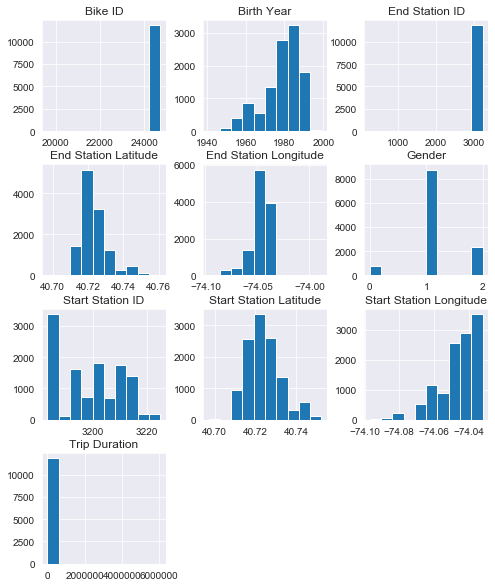

In [8]:
# quick look at the data
df.hist(figsize = (8,10));

In [9]:
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [10]:
# converting start and stop time columns to timestamp variable type
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Stop Time'] = pd.to_datetime(df['Stop Time'])

In [11]:
# time range of the dataset ? 1st December to 21st of Feb
print(df['Start Time'].min())
print(df['Stop Time'].max())
# 21 trips present very high duration trips  > 8h and we decided to first drop these inconsistent values 
df[df['Trip Duration'] > 28800].index
df = df.drop(labels = df[df['Trip Duration'] > 28800].index,axis=0)

2015-12-01 00:49:31
2016-02-21 02:03:32


In [12]:
# getting week of the day
df['Start Day'] = df['Start Time'].dt.day_name()
df['Stop Day'] = df['Stop Time'].dt.day_name()
# are the columns the same, meaning no bike was taken around midnight and returned the day after?
# it's the case for 46 cases
df[(df['Start Day'] != df['Stop Day'])].shape

(25, 17)

In [13]:
# changing the gender category labels to read it easier
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({0:'Unknown', 1:'Man', 2:'Woman'})
df['Gender'].head(3)

0    Man
1    Man
2    Man
Name: Gender, dtype: category
Categories (3, object): [Unknown, Man, Woman]

In [14]:
# adding age column for easier readability
df['Age'] = 2015 - df['Birth Year']
df['Age'].head(3)

0    40.0
1    33.0
2    32.0
Name: Age, dtype: float64

# ANALYSIS

## Questions that comes to mind:
- What are the different gender and age groups among the bike riders ?
- What days of the week and times of the day do people use more city bikes ?
- What are the most active stations ?

Let's have a look at the data and see what we have.

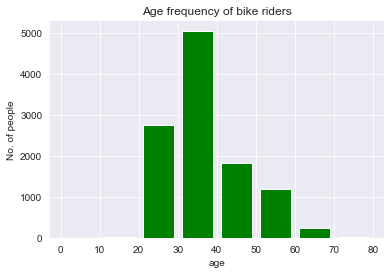

In [15]:
# Looking at the age distribution

# setting the ranges and no. of intervals
range = (0, 80)
bins = [0,10,20,30,40,50,60,70,80]
 
# plotting a histogram
plt.hist(df.Age, bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)
 
# x-axis label
plt.xlabel('age')
# frequency label
plt.ylabel('No. of people')
# plot title
plt.title('Age frequency of bike riders')
 
# function to show the plot
plt.show()

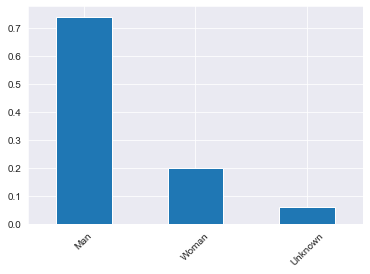

In [16]:
# Gender distribution
(df['Gender'].value_counts()/df['Gender'].shape[0]).plot(kind='bar');
plt.xticks(rotation=45);

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

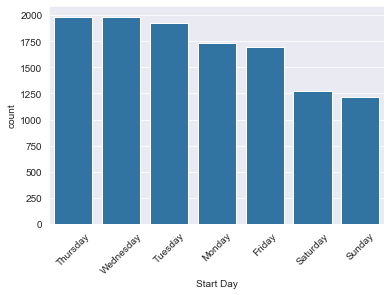

In [17]:
# what days of the week bikes are most used ?
base_color = sns.color_palette()[0]
sns.countplot(data =df,x='Start Day',color=base_color,order =df['Start Day'].value_counts().index);
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

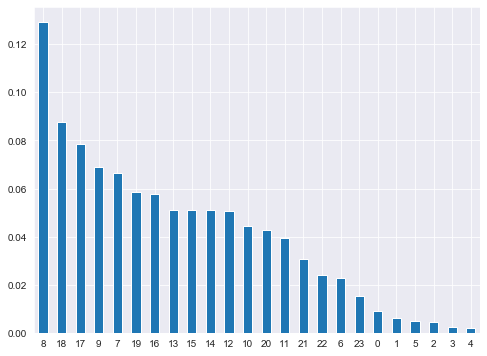

In [36]:
# time of the day when bikes are used
(df["Start Time"].dt.hour.value_counts()/df["Start Time"].dt.hour.value_counts().sum()).plot(kind='bar',figsize=(8,6))
plt.xticks(rotation=0,)

In [37]:
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'Start Day', 'Stop Day', 'Age'],
      dtype='object')

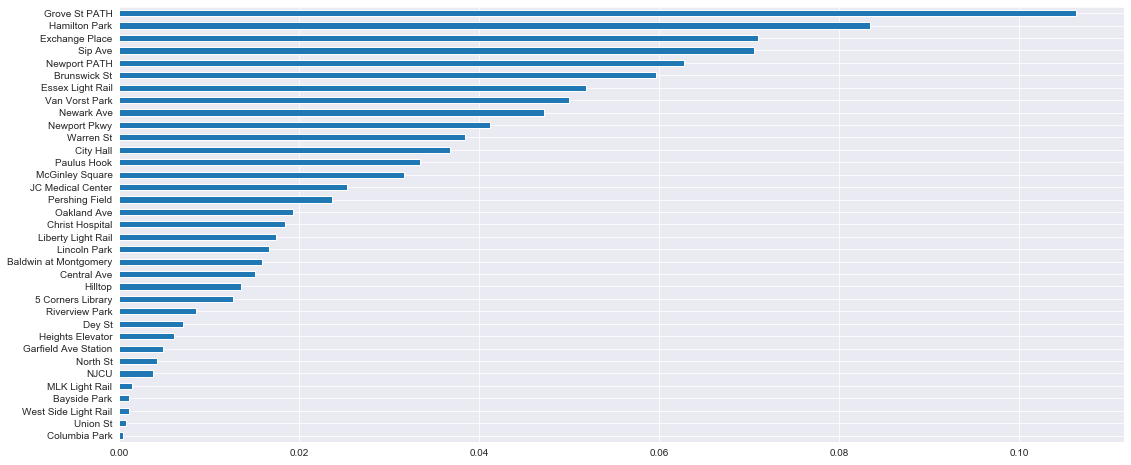

In [61]:
# busiest start stations
start_station = df['Start Station Name'].value_counts()/df['Start Station Name'].value_counts().sum()
ax = start_station.plot(kind='barh',figsize=(18,8))
ax.invert_yaxis()

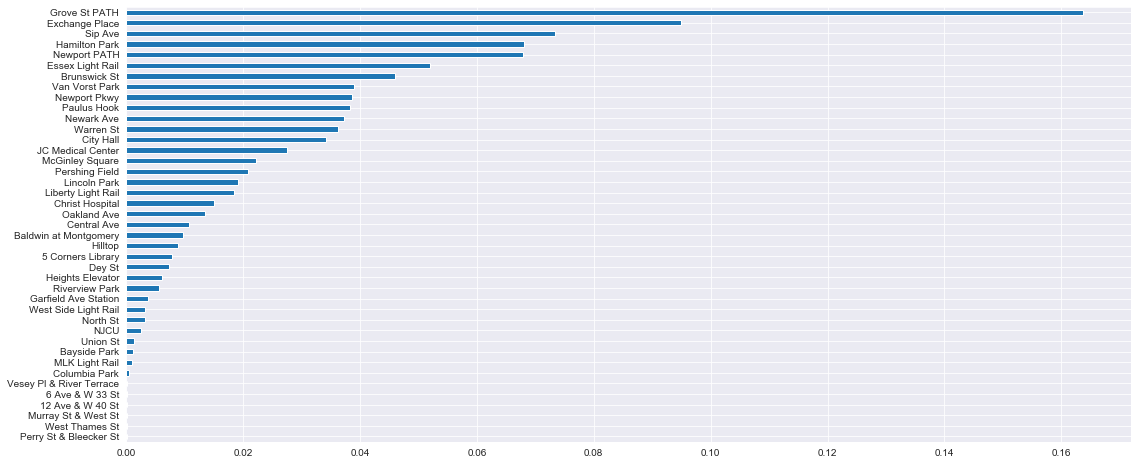

In [60]:
# busiest end stations
end_station = df['End Station Name'].value_counts()/df['End Station Name'].value_counts().sum()
ax = end_station.plot(kind='barh',figsize=(18,8))
ax.invert_yaxis()

In [72]:
print(df['Start Station Name'].value_counts().count())
print(df['End Station Name'].value_counts().count())

35
41


In [65]:
len(start_station.index)

35